<a href="https://colab.research.google.com/github/JenniferWang1234/Jennifer_Wang_DataBootcamp_Final/blob/main/Jennifer_Wang_FinalEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Students’ Exam Scores Through Lifestyle Habits

### Preliminiary Examination

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
# load Dataset
student_data = 'student_habits_performance.csv'
df = pd.read_csv(student_data)

In [3]:
# display first five rows of dataset
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
# overview of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
# younges student age
df['age'].min()

17

In [6]:
# oldest student age
df['age'].max()

24

In [7]:
# lowest study hours per day
df['study_hours_per_day'].min()

0.0

In [8]:
# highest study hours per day
df['study_hours_per_day'].max()

8.3

In [9]:
# lowest social media hours per day
df['social_media_hours'].min()

0.0

In [10]:
# highest social media hours per day
df['social_media_hours'].max()

7.2

In [11]:
# lowest netflix hours per day
df['netflix_hours'].min()

0.0

In [12]:
# highest netflix hours per day
df['netflix_hours'].max()

5.4

In [13]:
# lowest attendance percentage
df['attendance_percentage'].min()

56.0

In [14]:
# highest attendance percentage
df['attendance_percentage'].max()

100.0

In [15]:
# minimum sleep hours per day
df['sleep_hours'].min()

3.2

In [16]:
# maximum sleep hours per day
df['sleep_hours'].max()

10.0

In [17]:
# lowest weekly exercise frequency
df['exercise_frequency'].min()

0

In [18]:
# highest weekly exercise frequency
df['exercise_frequency'].max()

6

In [19]:
# look at the distriburtion of part time job
df['part_time_job'].value_counts()

,count
part_time_job,
No,785
Yes,215


In [20]:
# look at the distribution of diet quality
df['diet_quality'].value_counts()

,count
diet_quality,
Fair,437
Good,378
Poor,185


In [21]:
# look at the distribution of extracurricular participation
df['extracurricular_participation'].value_counts()

,count
extracurricular_participation,
No,682
Yes,318


In [22]:
# lowest exam score
df['exam_score'].min()

18.4

In [23]:
# highest exam score
df['exam_score'].max()

100.0

## Exploratory Data Analysis

**Note:** This Colab notebook for EDA includes more detailed visual analyses that I omitted from my written report.

#### Descriptive Statistics for the Target Variable: Exam Score

In [103]:
# mean exam score
df['exam_score'].mean()

np.float64(69.98074974670719)

In [104]:
# median exam score
df['exam_score'].median()

70.6

In [105]:
# lowest exam score
df['exam_score'].min()

18.4

In [106]:
# highest exam score
df['exam_score'].max()

100.0

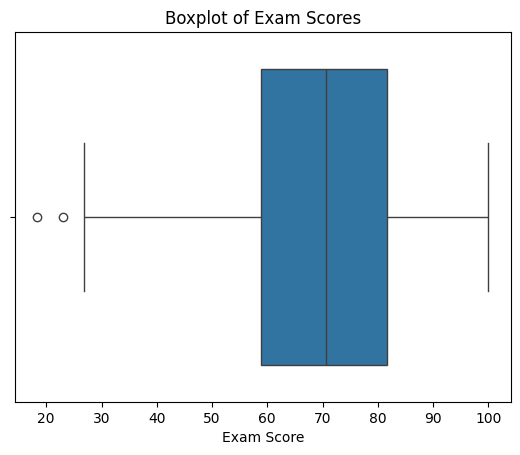

In [107]:
# box & whisker plot of exam scores
sns.boxplot(data = df, x = 'exam_score')
plt.title('Boxplot of Exam Scores')
plt.xlabel('Exam Score')
plt.show()

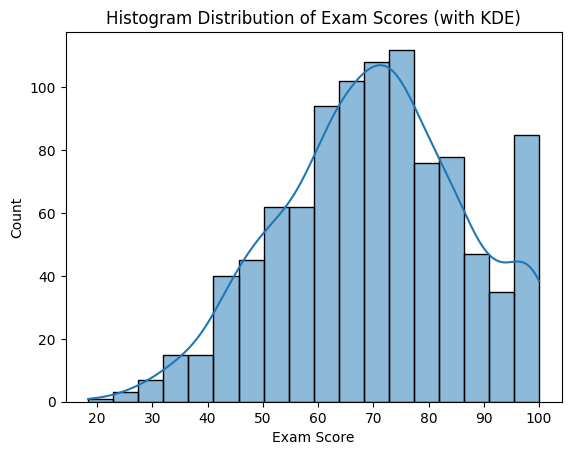

In [124]:
# histogram of exam scores with a KDE curve
sns.histplot(data = df, x = 'exam_score', kde=True)
plt.xlabel('Exam Score')
plt.title('Histogram Distribution of Exam Scores (with KDE)')
plt.show()

#### Initial Visualizations Between Independent Variables and the Target Variable

##### Numerical Features:

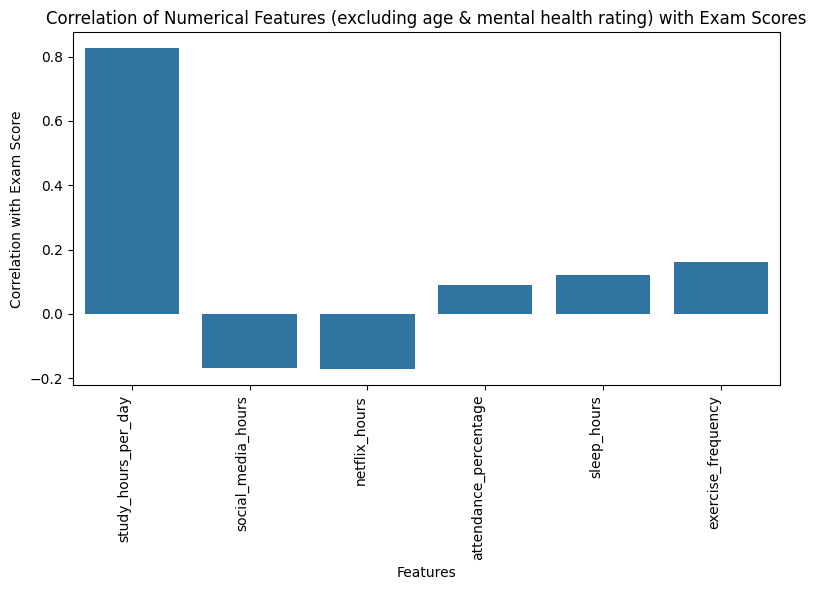

In [30]:
# Select only columns of numerical features (exclude exam scores, age, and mental health rating)
numeric_df = df.select_dtypes(include = 'number').drop(columns = ['exam_score', 'age', 'mental_health_rating'])

# Calculate correlation between each numerical feature and exam score
correlations = numeric_df.corrwith(df['exam_score'])

# Create a barplot to display the correletion between each numerical feature and exam scores
plt.figure(figsize = (8, 6))
sns.barplot(x = correlations.index, y = correlations.values)
plt.xticks(rotation = 90, ha = 'right')
plt.xlabel('Features')
plt.ylabel('Correlation with Exam Score')
plt.title('Correlation of Numerical Features (excluding age & mental health rating) with Exam Scores')
plt.tight_layout()
plt.show()

In [31]:
# display correlation values
correlations

,0
study_hours_per_day,0.825419
social_media_hours,-0.166733
netflix_hours,-0.171779
attendance_percentage,0.089836
sleep_hours,0.121683
exercise_frequency,0.160107


Below, I will create scatterplots of each of numerical features selected in the correlation barplot above to see if there are any nonlinear relationships.

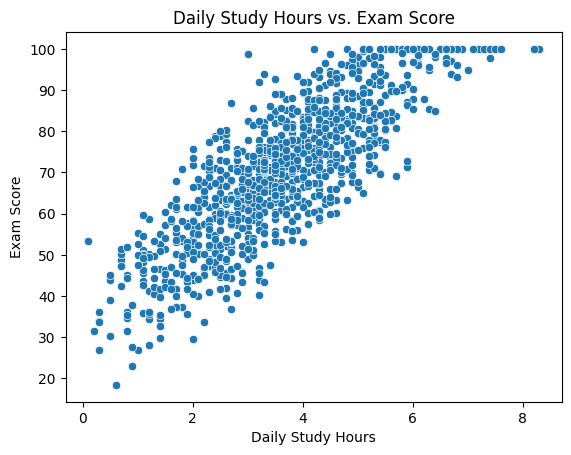

In [109]:
# scatterplot of study hours per day against exam score
sns.scatterplot(data = df, x = 'study_hours_per_day', y = 'exam_score')
plt.xlabel('Daily Study Hours')
plt.ylabel('Exam Score')
plt.title('Daily Study Hours vs. Exam Score')
plt.show()

The scatterplot above illustrates the relationship between students' daily study hours and their respective exam scores. There appear to be a strong positive, linear correlation between these two feature; students who achieved a higher exam score generally studied more hours per day. This linear relationship between daily study hours and exam score correspond with its high correlation value.

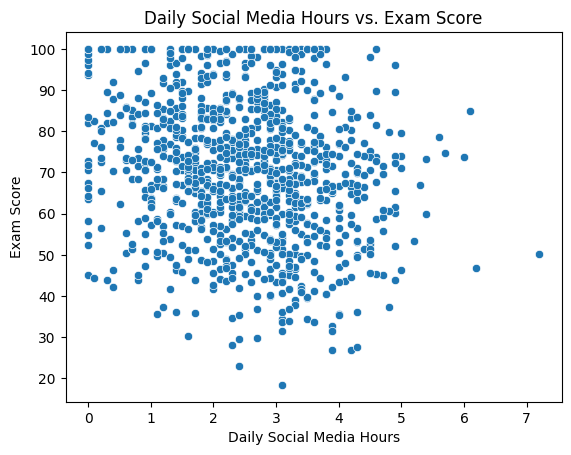

In [110]:
# scatterplot of social media hours per day against exam score
sns.scatterplot(data = df, x = 'social_media_hours', y = 'exam_score')
plt.xlabel('Daily Social Media Hours')
plt.ylabel('Exam Score')
plt.title('Daily Social Media Hours vs. Exam Score')
plt.show()

The scatterplot above demonstrates the relationship between students' daily social media hour and their exam score. There does not appear to be a major linear correlation between these two features. However, the scatterplot shows that most students spend around 1.5-3.5 hours daily on social media while there are only a few students spending more than 5 hours daily on social media.

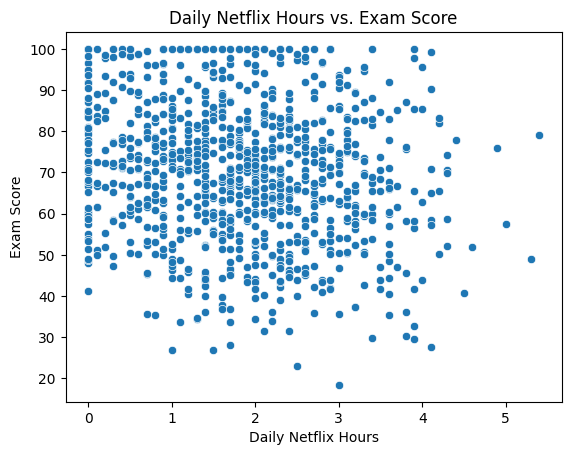

In [111]:
# scatterplot of netflix hours per day against exam score
sns.scatterplot(data = df, x = 'netflix_hours', y = 'exam_score')
plt.xlabel('Daily Netflix Hours')
plt.ylabel('Exam Score')
plt.title('Daily Netflix Hours vs. Exam Score')
plt.show()

The scatterplot above illustrates the relationship between hours a student spends daily on Netflix and their corresponding exam score. There does not appear to be a major linear correlation between these two features. Rather, this scatterplot shows a similar distribution as the scatterplot for daily social media hours against exam scores. Such a similarity suggests that students who spend a lot of time on one form of screen-based entertainment may also tend to spend more time on streaming platforms, and vice versa.

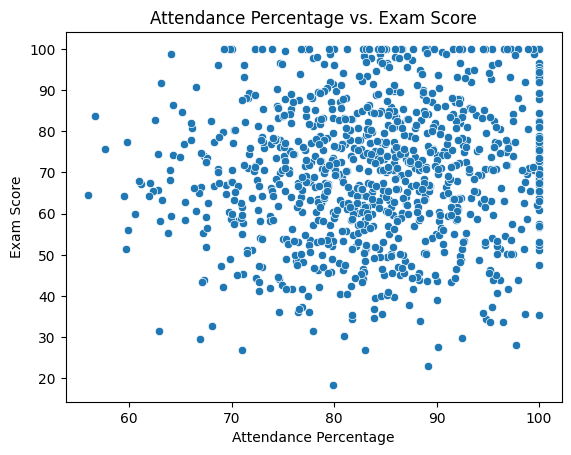

In [112]:
# scatterplot of attendance percentage against exam score
sns.scatterplot(data = df, x = 'attendance_percentage', y = 'exam_score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.title('Attendance Percentage vs. Exam Score')
plt.show()

The scatterplot above illustrates the relationship between students' attendance percentage and their exam scores. There does not appear to be a major linear correlation between these two features. However, the scatterplot shows that most students has attendance rate above 70% with far less students having an attendance percentage below 70% and no students attending less than 55% of class.

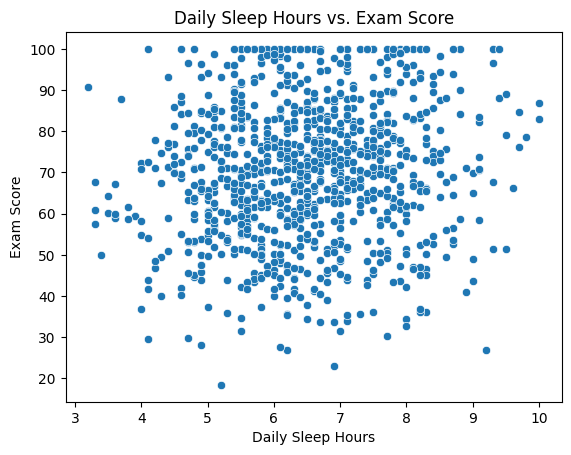

In [113]:
# scatterplot of sleep hours per day against exam score
sns.scatterplot(data = df, x = 'sleep_hours', y = 'exam_score')
plt.xlabel('Daily Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Daily Sleep Hours vs. Exam Score')
plt.show()

The scatterplot above demonstrates the spread of students' daily sleep hours and their corresponding exam scores. There does not appear to be a major linear correlation between these two features. However, the scatterplot is relatively more densely clustered around 5.5-8 hours. This suggests that most students obtain around 5.5-8 hours of sleep daily and far fewer students report very low (3-4 hours) or very high (above 9 hours) hours of sleep daily.

Although attendance percentage and daily sleep hours only have a correlation value of 0.9 and 0.12, respectively, I will still include these two features as models, such as K-Nearest Neighbors and Decision Tree, may capture their non-linear patterns, which could boost predictive capability and reveal deeper insights in relationship with exam scores.

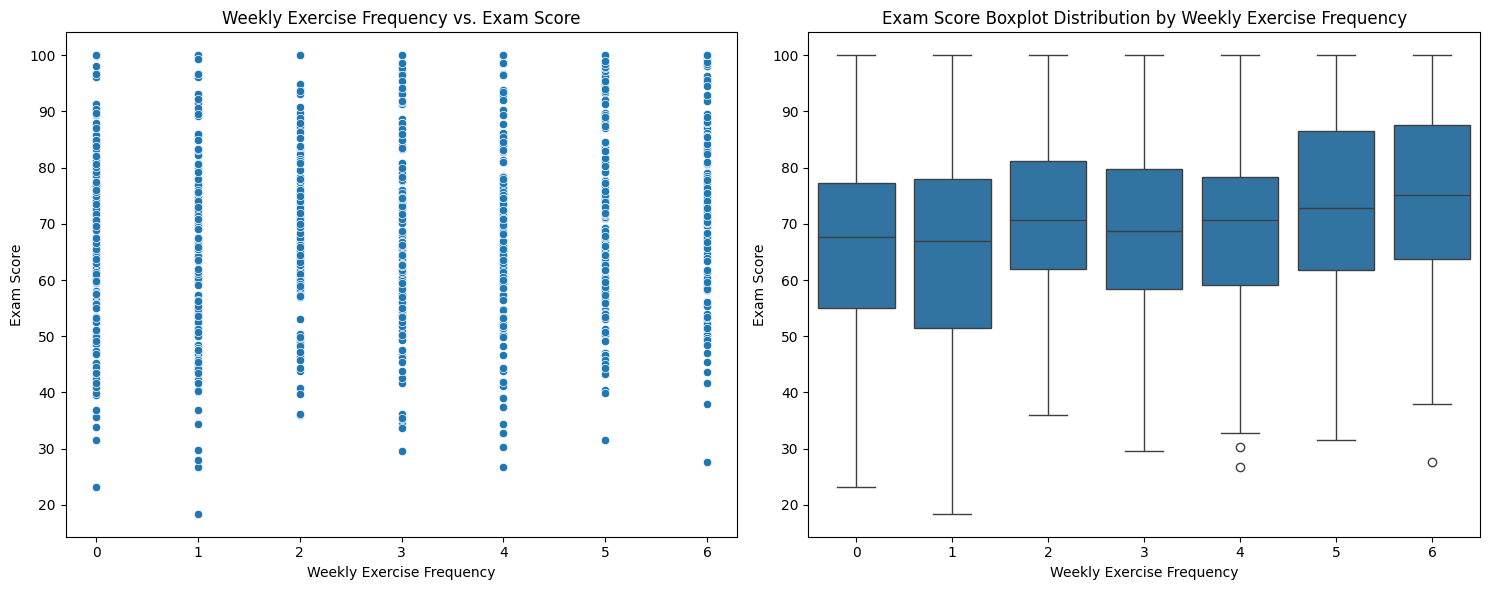

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# scatterplot of weekly exercise frequency against exam score
sns.scatterplot(data = df, x = 'exercise_frequency', y = 'exam_score', ax=axs[0])
axs[0].set_xlabel('Weekly Exercise Frequency')
axs[0].set_ylabel('Exam Score')
axs[0].set_title('Weekly Exercise Frequency vs. Exam Score')

# box & whisker plot of exam scores by weekly exercise frequency
sns.boxplot(data = df, x = 'exercise_frequency', y = 'exam_score', ax=axs[1])
axs[1].set_xlabel('Weekly Exercise Frequency')
axs[1].set_ylabel('Exam Score')
axs[1].set_title('Exam Score Boxplot Distribution by Weekly Exercise Frequency')

plt.tight_layout()
plt.show()

The scatterplot and boxplot above display the distribution of exam scores across weekly exercise frequency. Looking at the scatterplot, there does not appear to be a linear or non-linear relationship between these two features. Looking at the boxlot, students who exercise more regularly (5-6 times/week) have slightly higher overall exam score distribution. However, the variation in exam scores across different exercise frequencies is minimal, with no specific frequency showing a significant impact on exam scores.

Since weekly exercise frequency has the second highest positive correlation with exam scores, I will still include this feature in my models.

##### Categorical Features:

<ipython-input-115-f75ae6e7b52e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'part_time_job', y = 'exam_score', palette='deep')


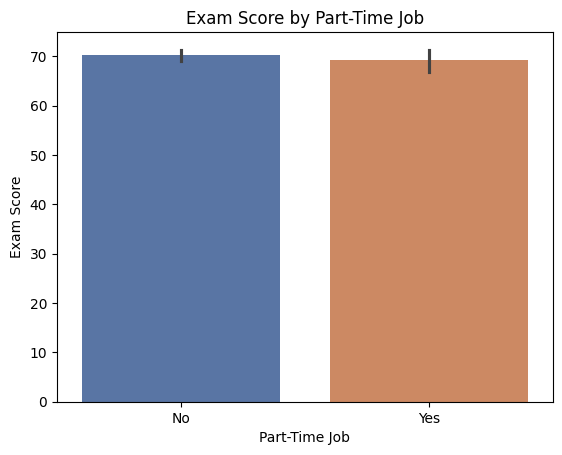

In [115]:
# barplot of part-time job and exam score
sns.barplot(data = df, x = 'part_time_job', y = 'exam_score', palette='deep')
plt.xlabel('Part-Time Job')
plt.ylabel('Exam Score')
plt.title('Exam Score by Part-Time Job')
plt.show();

The barplot above shows the average exam scores based on students' part-time job status (yes: have a part-time job; no: does not have a part-time job). Based on the barplot, students who work part-time and those who do not seem to have similar exam scores on average.

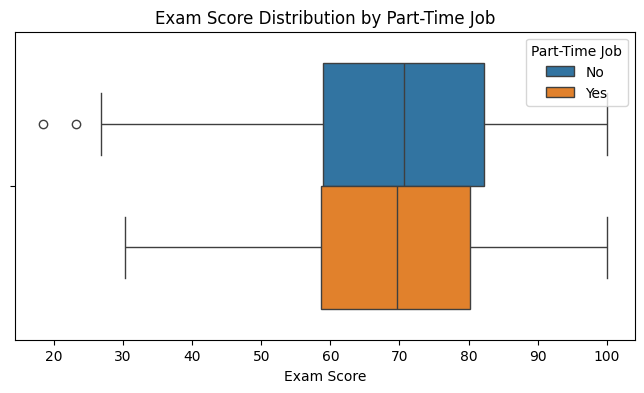

In [116]:
# box & whisker plot of exam scores by part-time job
plt.figure(figsize=(8, 4))
sns.boxplot(data = df, x = 'exam_score', hue = 'part_time_job')
plt.xlabel('Exam Score')
plt.legend(title='Part-Time Job', loc = 'upper right')
plt.title('Exam Score Distribution by Part-Time Job')
plt.show()

To further examine the relationship between part-time job and a student's exam score, I created a boxplot to look more in depth of the exam score distribution between students with and without a part-time job. As illustrated above, the overall distribution of exam scores is similar in both groups. Students without a part-time job exhibited a slightly wider range and outliers, suggesting more variability in this group, but it is not a drastic difference.

<ipython-input-117-1d1a410c499a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'diet_quality', y = 'exam_score', palette='deep')


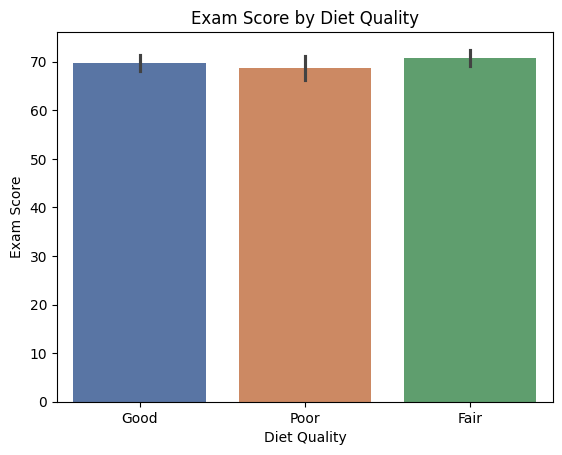

In [117]:
# barplot of diet quality and exam score
sns.barplot(data = df, x = 'diet_quality', y = 'exam_score', palette='deep')
plt.xlabel('Diet Quality')
plt.ylabel('Exam Score')
plt.title('Exam Score by Diet Quality')
plt.show();

The barplot above shows the average exam scores across three categories of diet quality. As illustrated above, differences in average exam score across all three categories are minor. No one diet quality seems to contribute significantly to a higher or lower exam score.

<ipython-input-118-2499522b7187>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'extracurricular_participation', y = 'exam_score', palette='deep')


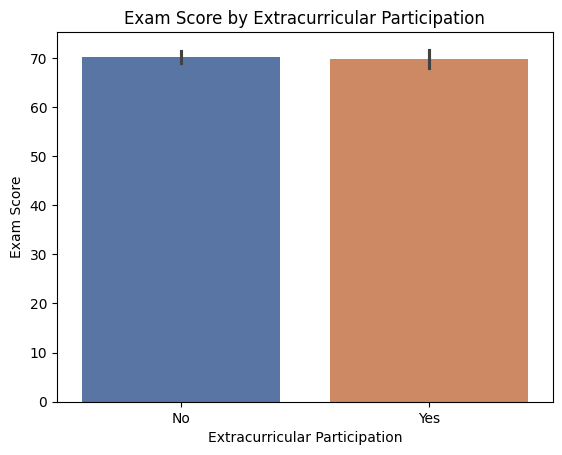

In [118]:
# barplot of extracurricular participation and exam score
sns.barplot(data = df, x = 'extracurricular_participation', y = 'exam_score', palette='deep')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Exam Score')
plt.title('Exam Score by Extracurricular Participation')
plt.show();

The barplot above shows the average exam scores based on students' extracurricular participation. Based on the barplot, students who participate in extracurricular activities and those who do not seem to have similar exam scores on average.

Although these categorical features reflecting students’ lifestyle habits do not show significant differences in exam scores overall, I will include them in my models to explore their potential interactions with other variables and their combined contribution to overall prediction.

#### Feature Engineering and Visualization

To better assess how a student's lifestyle habits may impact their exam scores, I performed feature engineering with existing features provided by the raw dataset.

##### 1. Screentime-Study Ratio

In [42]:
# Add a column of Screen Time-Study Ratio to the dataset
# This feature is calculated by dividing total screentime (social media hours + netflix hours) by daily study hours
df['screentime_study_ratio'] = (df['social_media_hours'] + df['netflix_hours']) / df['study_hours_per_day']

A lower ratio suggests that the student is dedicating relatively more hours daily to studying compared to hours spent on screen-based entertainment. A higher ratio indicates that the student is spending relatively more time daily on screen-based entertainment than on studying.

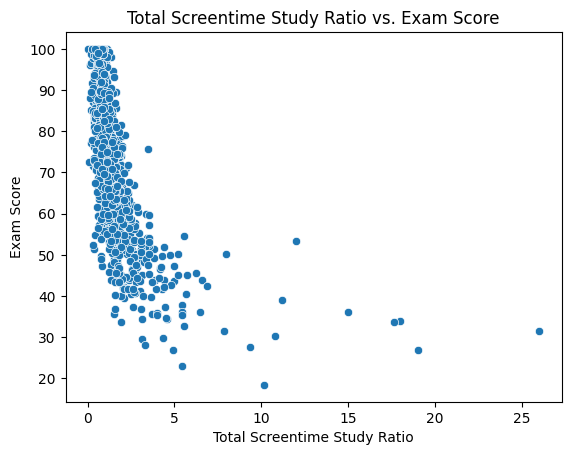

In [43]:
# scatterplot of daily total screentime study ratio against exam score
sns.scatterplot(data = df, x = 'screentime_study_ratio', y = 'exam_score')
plt.xlabel('Total Screentime Study Ratio')
plt.ylabel('Exam Score')
plt.title('Total Screentime Study Ratio vs. Exam Score')
plt.show()

The scatterplot above shows the relationship between total screentime-study ratio and exam scores. There is a strong negative correlation between these two features, suggesting students who spend more time on screen-based entertainment than studying generally achieve a lower exam score. Most high-performing students (exam scores above 75) exhibit a low screentime-study ratio.

##### 2. Sleep-Study Ratio

In [44]:
# Add a column of Sleep-Study Ratio to the dataset
# This feature is calculated by dividing daily sleep hours by daily study hours
df['sleep_study_ratio'] = df['sleep_hours'] / df['study_hours_per_day']

A lower ratio may indicate that the student is spending more time daily studying relative to sleeping. A higher ratio may suggest an overmephasis on sleeping.

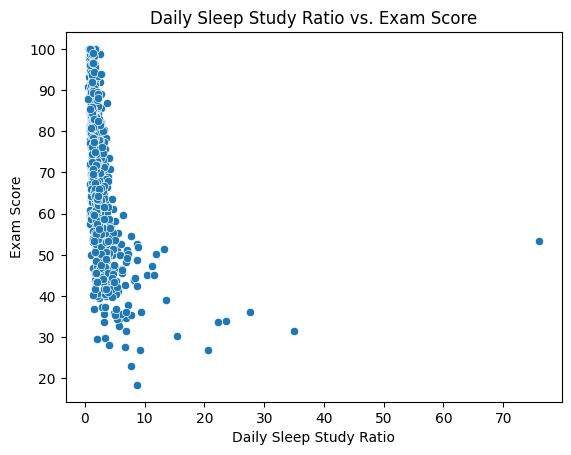

In [45]:
# scatterplot of daily sleep study ratio against exam score
sns.scatterplot(data = df, x = 'sleep_study_ratio', y = 'exam_score')
plt.xlabel('Daily Sleep Study Ratio')
plt.ylabel('Exam Score')
plt.title('Daily Sleep Study Ratio vs. Exam Score')
plt.show()

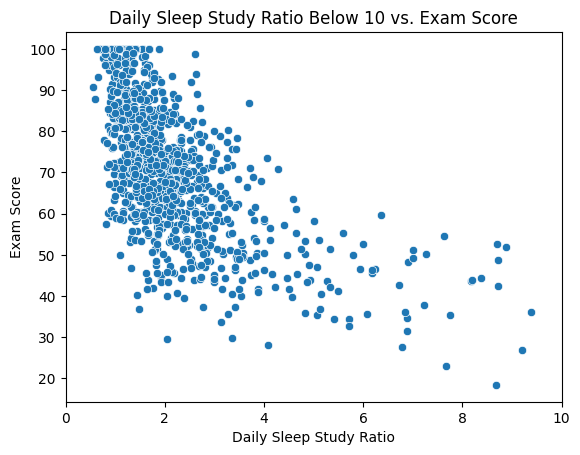

In [46]:
# zoom in on daily sleep study ratio below 10 to see if the negative trend persists
sns.scatterplot(data = df[df['sleep_study_ratio'] < 10], x = 'sleep_study_ratio', y = 'exam_score')
plt.xlabel('Daily Sleep Study Ratio')
plt.ylabel('Exam Score')
plt.title('Daily Sleep Study Ratio Below 10 vs. Exam Score')
plt.xlim(0, 10)
plt.show()

The scatterplots above illustrate the relationship between students' daily sleep-study ratio and their exam scores, with the second plot showing a closer, more detailed look at the lower end of the ratio scale. There is a strong negative correlation between these two features, suggesting students who spend relatively more time daily sleeping than studying generally have a lower exam score. This relationship may indicate that an overemphasis on sleeping could reduce study time available.

##### 3. Exercise-Study Ratio

In [47]:
# Add a column of Exercise-Study Ratio to the dataset
# This feature is calculated by dividing weekly exercise frequency by daily study hours
df['exercise_study_ratio'] = df['exercise_frequency'] / df['study_hours_per_day']

A lower ratio may indicate the student is dedicating relatively more time studying compared to exercise. A higher ratio may suggest an overemphasis on exercising, which could possibly lead to insufficient study time.

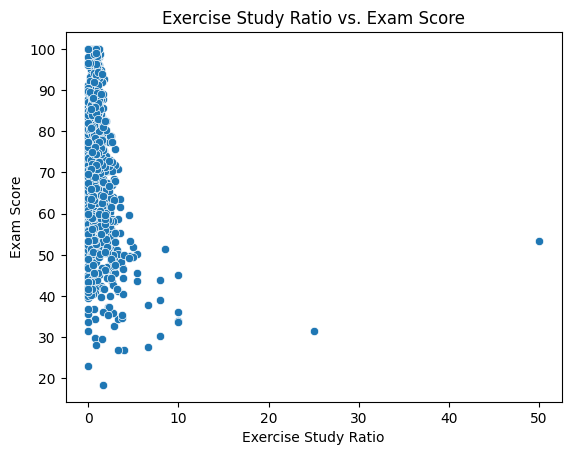

In [48]:
# scatterplot of exercise study ratio against exam score
sns.scatterplot(data = df, x = 'exercise_study_ratio', y = 'exam_score')
plt.xlabel('Exercise Study Ratio')
plt.ylabel('Exam Score')
plt.title('Exercise Study Ratio vs. Exam Score')
plt.show()

The scatterplot above compares students' exercise-study ratio to their exam scores. While lower ratios are the most common, it is also associated with a wide range of exam scores, suggesting that spending more time studying relative to exercising is not a strong predictor of a student's exam performance on its own. However, the scatterplot shows that most students in this dataset allocate more time to studying than to exercising.

In [49]:
# look at the new dataset with added features
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,screentime_study_ratio,sleep_study_ratio,exercise_study_ratio
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,inf,inf,inf
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,0.739130,0.666667,0.869565
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,3.142857,5.714286,0.714286
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.900000,9.200000,4.000000
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,0.980000,0.980000,0.600000


In [50]:
# Extract rows with 'inf' value, which are a result of 0 daily study hours
inf_rows = df[df.isin([np.inf, -np.inf]).any(axis=1)]
inf_rows

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,screentime_study_ratio,sleep_study_ratio,exercise_study_ratio
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,inf,inf,inf
186,S1186,18,Female,0.0,1.9,1.5,No,82.4,5.6,Fair,3,Bachelor,Average,8,No,55.2,inf,inf,inf
195,S1195,18,Female,0.0,2.8,1.6,No,93.4,5.8,Fair,0,Bachelor,Good,5,No,26.7,inf,inf,NaN
379,S1379,17,Male,0.0,2.6,1.6,No,82.4,7.4,Good,5,High School,Average,3,No,32.9,inf,inf,inf
402,S1402,19,Male,0.0,1.4,0.0,No,81.5,6.7,Good,5,High School,Good,8,Yes,50.1,inf,inf,inf
431,S1431,22,Female,0.0,2.0,2.5,No,82.0,3.7,Poor,4,Bachelor,Average,2,No,29.9,inf,inf,inf
434,S1434,20,Male,0.0,3.5,3.2,No,72.6,6.2,Fair,3,High School,Good,2,No,26.2,inf,inf,inf
590,S1590,17,Female,0.0,4.6,1.2,No,96.2,6.1,Poor,6,Bachelor,Average,7,No,42.0,inf,inf,inf
766,S1766,21,Male,0.0,2.4,2.9,No,85.6,3.8,Poor,3,NaN,Average,8,No,30.5,inf,inf,inf
811,S1811,19,Female,0.0,2.4,0.6,Yes,87.0,7.1,Good,4,High School,Average,5,No,53.0,inf,inf,inf


In [51]:
len(inf_rows)

13

Since there are only 13 rows with 'inf', accounting for a small portion of the entire dataset, I chose to drop these rows.

In [52]:
# drop rows with 'inf'
index_to_drop = inf_rows.index
df = df.drop(index_to_drop)

In [53]:
# make sure the rows are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 1 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     987 non-null    object 
 1   age                            987 non-null    int64  
 2   gender                         987 non-null    object 
 3   study_hours_per_day            987 non-null    float64
 4   social_media_hours             987 non-null    float64
 5   netflix_hours                  987 non-null    float64
 6   part_time_job                  987 non-null    object 
 7   attendance_percentage          987 non-null    float64
 8   sleep_hours                    987 non-null    float64
 9   diet_quality                   987 non-null    object 
 10  exercise_frequency             987 non-null    int64  
 11  parental_education_level       897 non-null    object 
 12  internet_quality               987 non-null    object 


In [123]:
# export the updated dataframe as a csv for the modeling colab notebook

from google.colab import files

df.to_csv('updated_student_habits_performance.csv', index=False)
files.download('updated_student_habits_performance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Note:** All visual graphs and statistics under the "Exploratory Data Analysis" section are updated with the new dataset (one that had 13 rows dropped), which all showed no major differences.